In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from statsmodels.graphics.gofplots import qqplot
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE


import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read Heart Disease dataset
df = pd.read_csv('/Users/linweicheng/Coding/二下資料探勘概論/資料探勘期末/heart.csv')

In [3]:
# Print number of observations and attributes 
print('\033[1m'+'.: Dataset Info :.'+'\033[0m')
print('*' * 30)
print('Total Rows:'+'\033[1m', df.shape[0])
print('\033[0m'+'Total Columns:'+'\033[1m', df.shape[1])
print('\033[0m'+'*' * 30)

.: Dataset Info :.
******************************
Total Rows: 1025
Total Columns: 14
******************************


In [4]:
# Original info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
# Change the categorical features to 'object'
wrong_dtype = ['thal', 'ca', 'slope', 'exang', 'restecg', 'fbs', 'cp', 'sex']
df[wrong_dtype] = df[wrong_dtype].astype(object)

In [6]:
# Info after correcting dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   object 
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   object 
 6   restecg   1025 non-null   object 
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1025 non-null   object 
 12  thal      1025 non-null   object 
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 112.2+ KB


In [7]:
# Split numerical & categorical attributes
numerical_att = df.select_dtypes(exclude = np.object_)
categorical_att = df.select_dtypes(exclude = np.number)

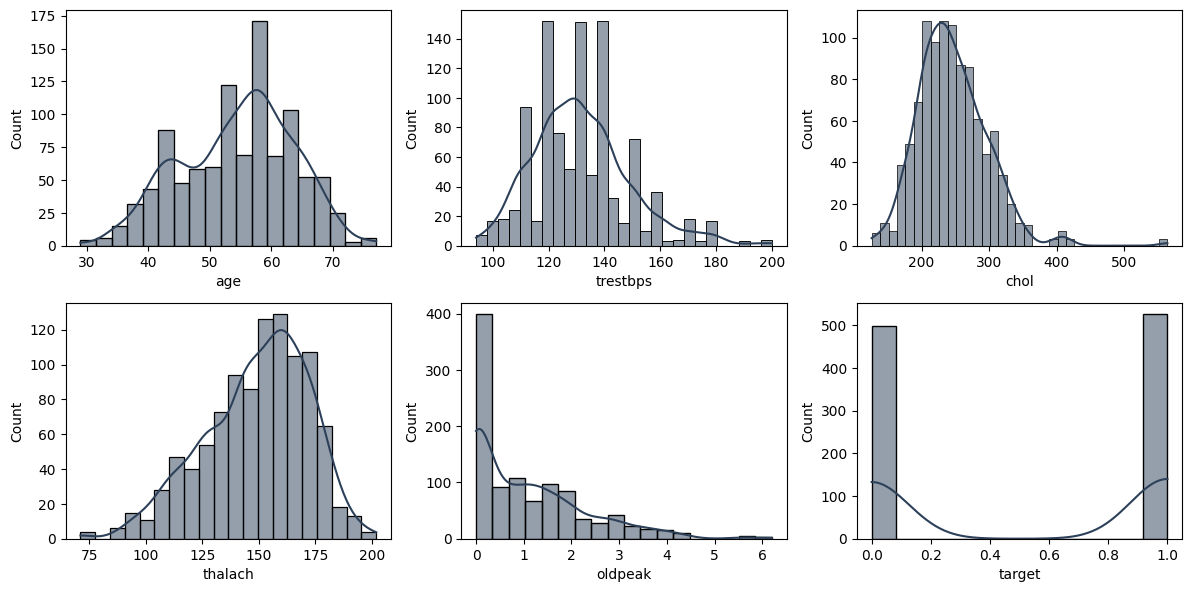

In [8]:
# Numerical attributes
colors = ['#2D4059'] # grey
plt.figure(figsize=(12, 6))
for index, column in enumerate(numerical_att):
    plt.subplot(2, 3, index+1)
    sns.histplot(data = numerical_att, x = column, kde = True, color = colors[0])
    plt.xticks()
plt.tight_layout(pad = 1.0)
plt.show()

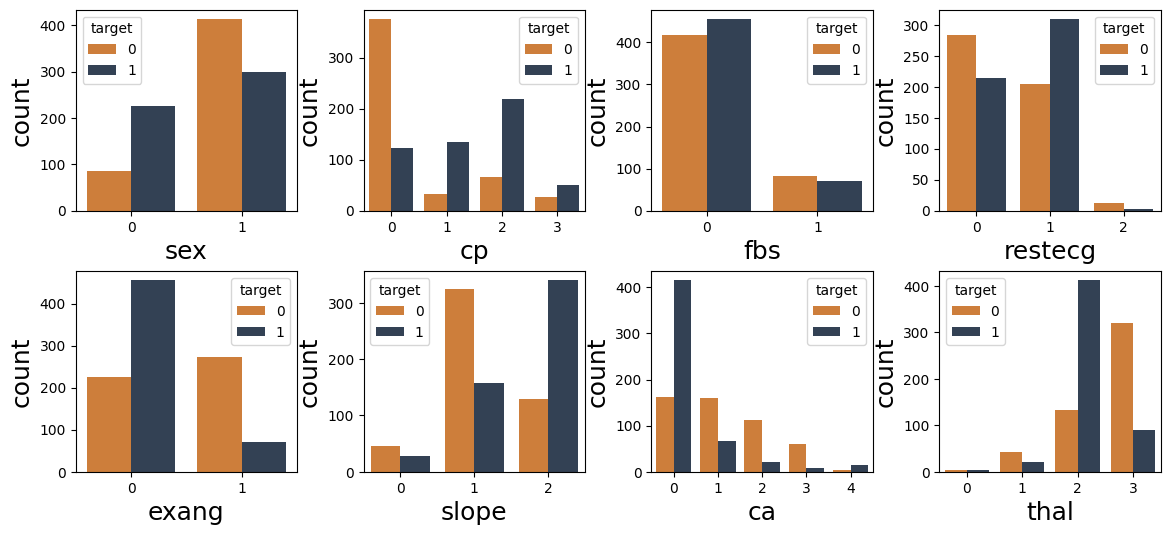

In [9]:
# Categorical attributes
colors = ['#E57C23', '#2D4059']  #(orange, dark blue)
cate_att = categorical_att.columns
fig = plt.figure(figsize=(14, 6))
for index in range(len(cate_att)):
    if cate_att[index] != 'target':
        plt.subplot(2, 4, index + 1)
        sns.countplot(data = categorical_att, x = cate_att[index], 
                      hue = df['target'], palette = colors)
        plt.xlabel(cate_att[index], fontsize=18)
        plt.ylabel("count", fontsize = 18)
        plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

*************************
.: Sex (Gender) Total :.
*************************


1    713
0    312
Name: sex, dtype: int64

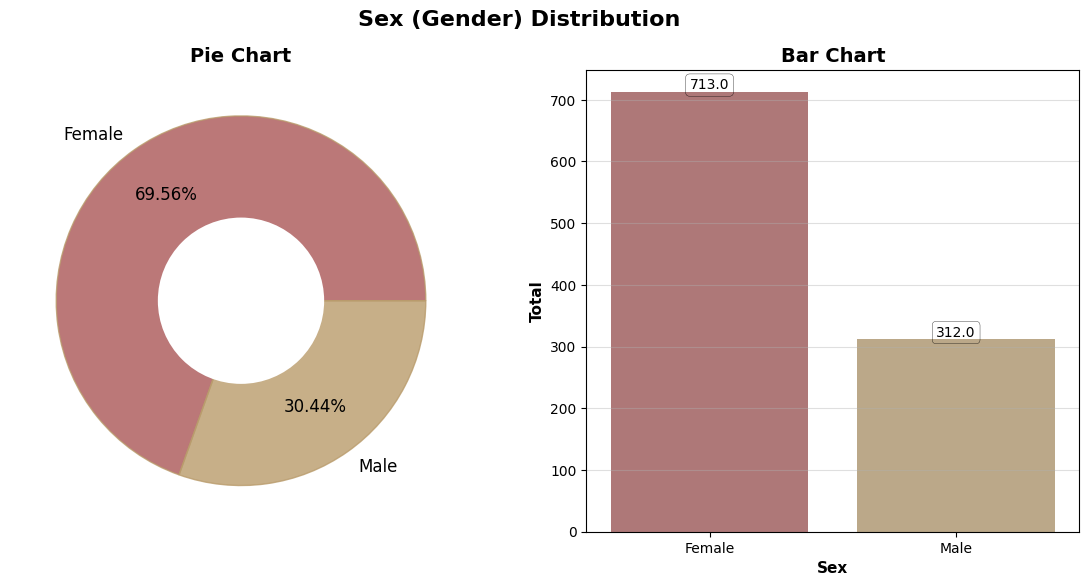

In [10]:
# Sex - categorical(1)
colors = ['#AA5656', '#B99B6B']
labels = ['Female', 'Male']
order = df['sex'].value_counts().index

# Plot frame
plt.figure(figsize=(14, 6))
plt.suptitle('Sex (Gender) Distribution', fontweight='heavy',
             fontsize='16', fontfamily='sans-serif')

# Pie Chart 
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
plt.pie(df['sex'].value_counts(), labels=labels, colors=colors, pctdistance=0.7, autopct='%.2f%%', 
        wedgeprops=dict(alpha=0.8, edgecolor=colors[1]), textprops={'fontsize': 12})
centre = plt.Circle((0, 0), 0.45, fc='w')
plt.gcf().gca().add_artist(centre)

# Bar chart
countplt = plt.subplot(1, 2, 2)
plt.title('Bar Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
ax = sns.countplot(x='sex', data=df, palette=colors, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2, rect.get_height()+4.25, rect.get_height(), horizontalalignment='center', 
            fontsize=10, bbox=dict(facecolor='none', linewidth=0.25, boxstyle='round'))

plt.xlabel('Sex', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)

# Count Categorical Labels
print('*' * 25)
print('\033[1m'+'.: Sex (Gender) Total :.'+'\033[0m')
print('*' * 25)
df.sex.value_counts(dropna=False)

******************************
.: Chest Pain Type Total :.
******************************


0    497
2    284
1    167
3     77
Name: cp, dtype: int64

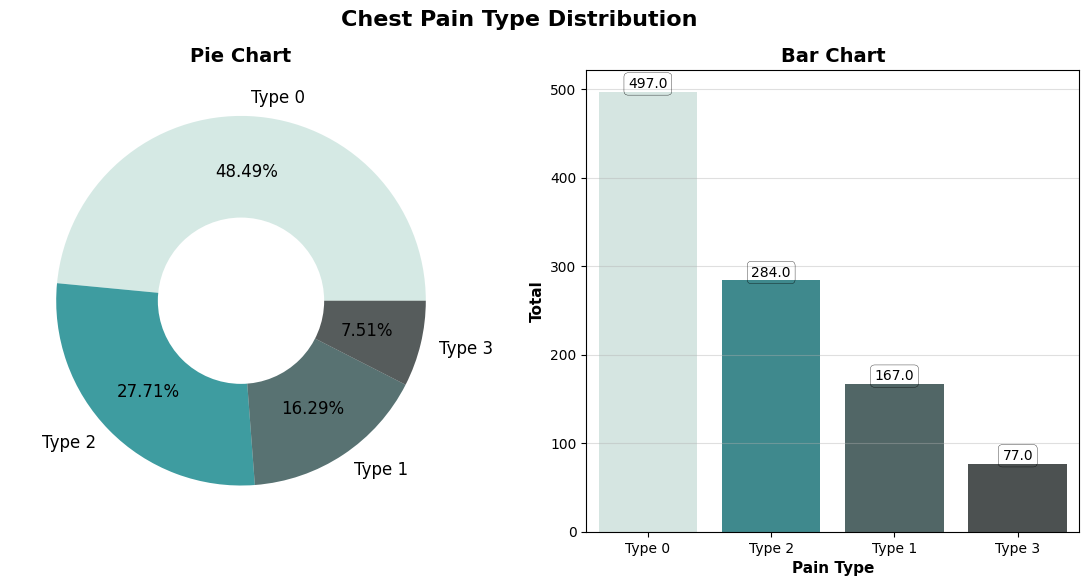

In [11]:
# Chest Pain Type - categorical(2)
colors = ['#CBE4DE', '#0E8388', '#2E4F4F', '#2C3333']
labels = ['Type 0', 'Type 2', 'Type 1', 'Type 3']
order = df['cp'].value_counts().index

# Plot frame
plt.figure(figsize = (14, 6))
plt.suptitle('Chest Pain Type Distribution', fontweight='heavy', fontsize=16,fontfamily='sans-serif')

# Pie Chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.pie(df['cp'].value_counts(), labels=labels, colors=colors, pctdistance=0.7, autopct='%.2f%%', 
        textprops={'fontsize': 12}, wedgeprops=dict(alpha=0.8))
centre = plt.Circle((0, 0), 0.45, fc="w")
plt.gcf().gca().add_artist(centre)

# Bar chart
countplt = plt.subplot(1, 2, 2)
plt.title('Bar Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='cp', data=df, palette=colors, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2, rect.get_height()+4.25, rect.get_height(), horizontalalignment='center', 
            fontsize=10, bbox=dict(facecolor='none', linewidth=0.25, boxstyle='round'))

plt.xlabel('Pain Type', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.xticks([0, 1, 2, 3], labels)
plt.grid(axis='y', alpha=0.4)

# Count Categorical Labels
print('*' * 30)
print('\033[1m'+'.: Chest Pain Type Total :.'+'\033[0m')
print('*' * 30)
df.cp.value_counts(dropna=False)

********************************
.: Fasting Blood Sugar Total :.
********************************


0    872
1    153
Name: fbs, dtype: int64

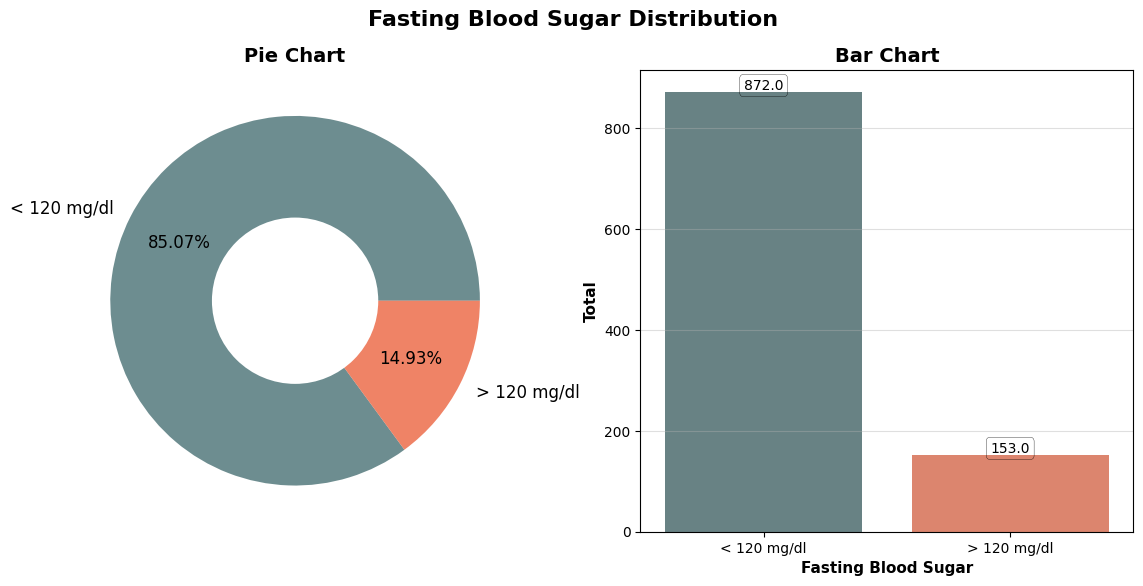

In [12]:
# Fasting blood sugar - categorical(3)
colors = ['#497174', '#EB6440']
labels = ['< 120 mg/dl', '> 120 mg/dl']
order = df['fbs'].value_counts().index

# Plot frame
plt.figure(figsize=(14, 6))
plt.suptitle('Fasting Blood Sugar Distribution', fontweight='heavy', fontsize=16, fontfamily='sans-serif')

# Pie Chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.pie(df['fbs'].value_counts(), labels=labels, colors=colors, wedgeprops=dict(alpha=0.8), 
        autopct='%.2f%%',pctdistance=0.7, textprops={'fontsize': 12})
centre = plt.Circle((0, 0), 0.45, fc='w')
plt.gcf().gca().add_artist(centre)

# Bar chart
countplt = plt.subplot(1, 2, 2)
plt.title('Bar Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='fbs', data=df, palette=colors, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2, rect.get_height()+4.25, rect.get_height(), horizontalalignment='center', 
            fontsize=10, bbox=dict(facecolor='none', linewidth=0.25, boxstyle='round'))

plt.xlabel('Fasting Blood Sugar', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)

# Count Categorical Labels
print('*' * 32)
print('\033[1m'+'.: Fasting Blood Sugar Total :.'+'\033[0m')
print('*' * 32)
df.fbs.value_counts(dropna=False)

**************************************************
.: Resting Electrocardiographic Results Total :.
**************************************************


1    513
0    497
2     15
Name: restecg, dtype: int64

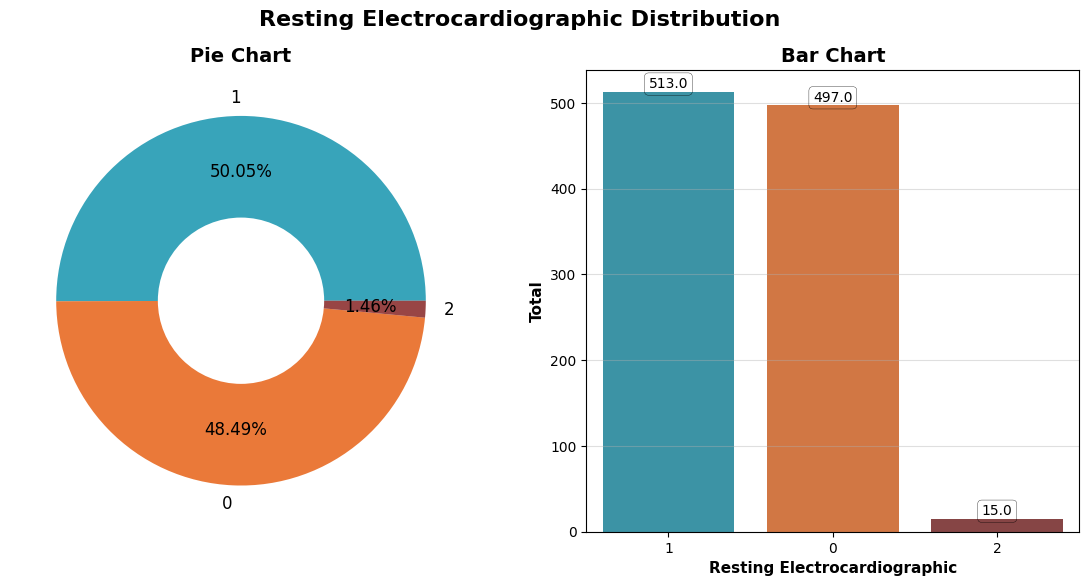

In [13]:
# restecg (Resting Electrocardiographic Results) - categorical(4)
colors = ['#068DA9', '#E55807', '#7E1717']
labels = ['1', '0', '2']
order = df['restecg'].value_counts().index

# Plot frame
plt.figure(figsize=(14, 6))
plt.suptitle('Resting Electrocardiographic Distribution',
             fontweight='heavy', fontsize=16, fontfamily='sans-serif')

# Pie Chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold',
          fontsize=14, fontfamily='sans-serif',)
plt.pie(df['restecg'].value_counts(), labels=labels, colors=colors, wedgeprops=dict(alpha=0.8),
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize': 12})
centre = plt.Circle((0, 0), 0.45, fc='w')
plt.gcf().gca().add_artist(centre)

# Bar chart
countplt = plt.subplot(1, 2, 2)
plt.title('Bar Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='restecg', data=df, palette=colors,
                   order=order, alpha=0.85)
for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2, rect.get_height()+4.25, rect.get_height(), horizontalalignment='center',
            fontsize=10, bbox=dict(facecolor='none', linewidth=0.25, boxstyle='round'))

plt.xlabel('Resting Electrocardiographic', fontweight='bold',
           fontsize=11, fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.grid(axis='y', alpha=0.4)

# Count Categorical Labels
print('*' * 50)
print('\033[1m'+'.: Resting Electrocardiographic Results Total :.'+'\033[0m')
print('*' * 50)
df.restecg.value_counts(dropna=False)

***********************************
.: Exercise Induced Angina Total :.
***********************************


0    680
1    345
Name: exang, dtype: int64

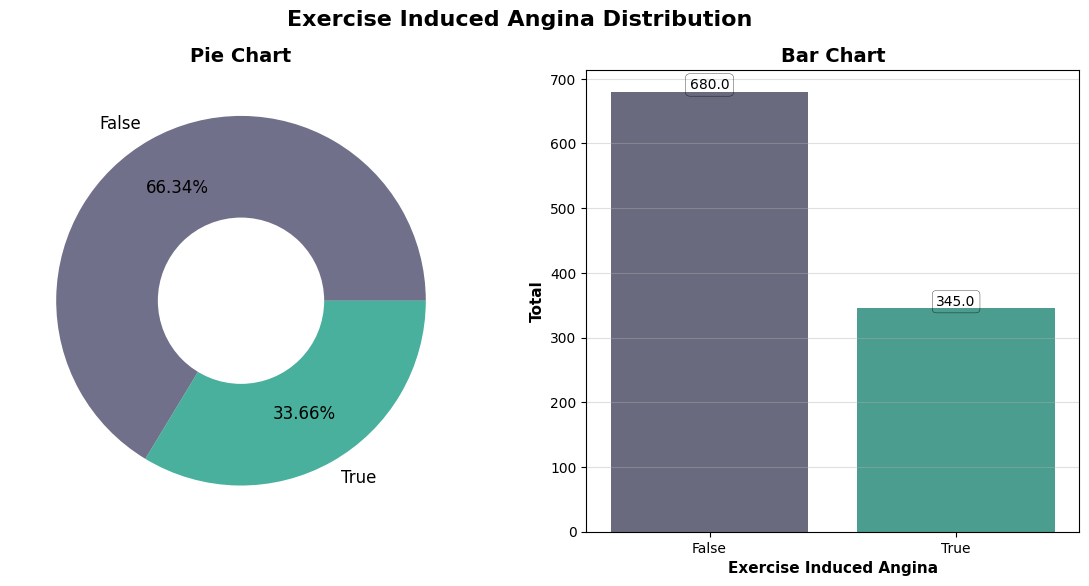

In [14]:
# exang (Exercise Induced Angina)- categorical(5)
colors = ['#4C4C6D', '#1B9C85']
labels = ['False', 'True']
order = df['exang'].value_counts().index

# Plot frame
plt.figure(figsize=(14, 6))
plt.suptitle('Exercise Induced Angina Distribution', fontweight='heavy', fontsize=16, fontfamily='sans-serif')

# Pie Chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.pie(df['exang'].value_counts(), labels=labels, colors=colors, wedgeprops=dict(alpha=0.8), 
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize': 12})
centre = plt.Circle((0, 0), 0.45, fc='w')
plt.gcf().gca().add_artist(centre)

# Bar chart
countplt = plt.subplot(1, 2, 2)
plt.title('Bar Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='exang', data=df, palette=colors, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2, rect.get_height()+4.25, rect.get_height(), horizontalalignment='center', 
            fontsize=10, bbox=dict(facecolor='none', linewidth=0.25, boxstyle='round'))

plt.xlabel('Exercise Induced Angina', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)

# Count Categorical Labels
print('*' * 35)
print('\033[1m'+'.: Exercise Induced Angina Total :.'+'\033[0m')
print('*' * 35)
df.exang.value_counts(dropna=False)

********************
.: Slope Total :.
********************


1    482
2    469
0     74
Name: slope, dtype: int64

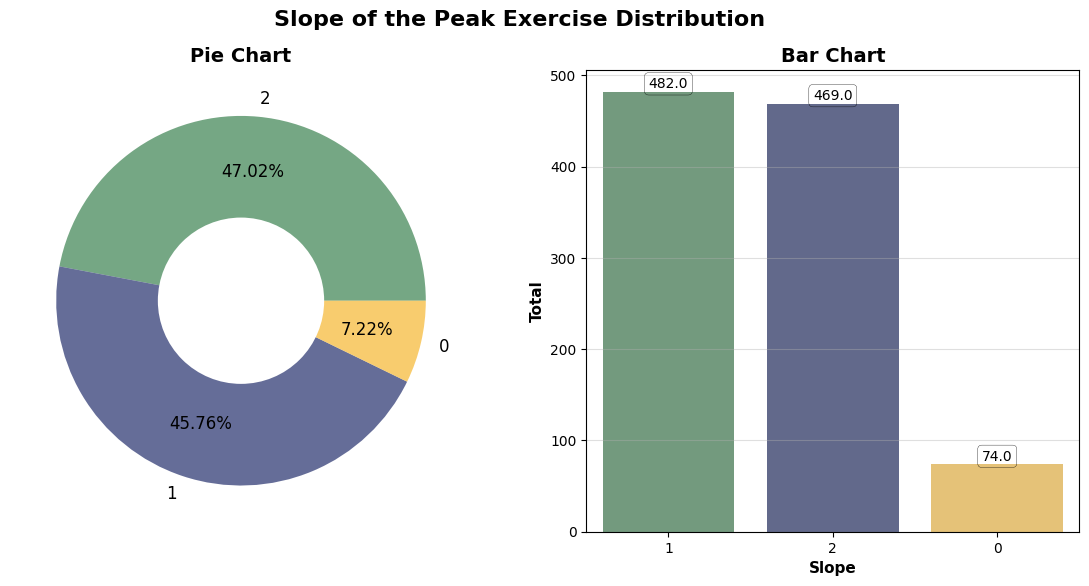

In [15]:
# slope (Slope for Peak Exercise) - categorical(6)
colors = ['#539165', '#3F497F', '#F7C04A']
labels = ['2', '1', '0']
order = df['slope'].value_counts().index

# Plot frame
plt.figure(figsize=(14, 6))
plt.suptitle('Slope of the Peak Exercise Distribution', fontweight='heavy', fontsize=16, fontfamily='sans-serif')

# Pie Chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
plt.pie(df['slope'].value_counts(), labels=labels, colors=colors, wedgeprops=dict(alpha=0.8),
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize': 12})
centre = plt.Circle((0, 0), 0.45, fc='w')
plt.gcf().gca().add_artist(centre)

# Bar chart
countplt = plt.subplot(1, 2, 2)
plt.title('Bar Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='slope', data=df, palette=colors, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2, rect.get_height()+4.25, rect.get_height(), horizontalalignment='center',
            fontsize=10, bbox=dict(facecolor='none', linewidth=0.25, boxstyle='round'))

plt.xlabel('Slope', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.grid(axis='y', alpha=0.4)

# Count Categorical Labels
print('*' * 20)
print('\033[1m'+'.: Slope Total :.'+'\033[0m')
print('*' * 20)
df.slope.value_counts(dropna=False)


****************************************
.: Number of Major Vessels Total :.
****************************************


0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

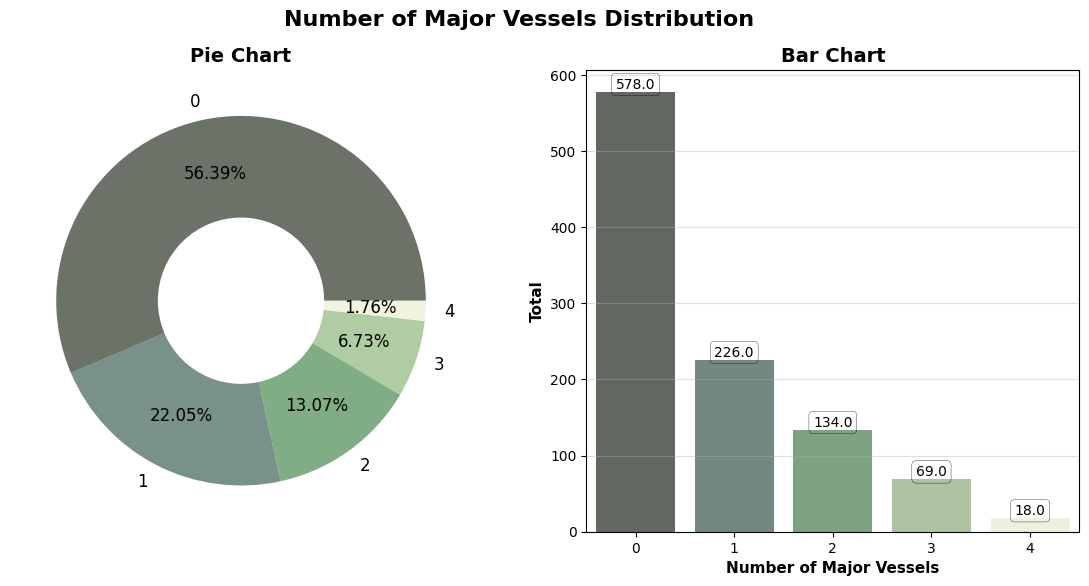

In [16]:
# ca (Number of Major Vessels) - categorical(7)
colors = ['#464F41', '#56776C', '#609966', '#9DC08B', '#EDF1D6']
labels = ['0', '1', '2', '3', '4']
order = df['ca'].value_counts().index

# Plot frame
plt.figure(figsize=(14, 6))
plt.suptitle('Number of Major Vessels Distribution', fontweight='heavy', fontsize=16, fontfamily='sans-serif')

# Pie Chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.pie(df['ca'].value_counts(), labels=labels, colors=colors, wedgeprops=dict(alpha=0.8),
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize': 12})

centre = plt.Circle((0, 0), 0.45, fc='w')
plt.gcf().gca().add_artist(centre)

# Bar chart
countplt = plt.subplot(1, 2, 2)
plt.title('Bar Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='ca', data=df, palette=colors,
                   order=order, alpha=0.85)
for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2, rect.get_height()+4.25, rect.get_height(), horizontalalignment='center', 
            fontsize=10, bbox=dict(facecolor='none', linewidth=0.25, boxstyle='round'))

plt.xlabel('Number of Major Vessels', fontweight='bold', fontsize=11,
           fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.grid(axis='y', alpha=0.4)

# Count Categorical Labels
print('*' * 40)
print('\033[1m'+'.: Number of Major Vessels Total :.'+'\033[0m')
print('*' * 40)
df.ca.value_counts(dropna=False)

********************
.: "thal" Total :.
********************


2    544
3    410
1     64
0      7
Name: thal, dtype: int64

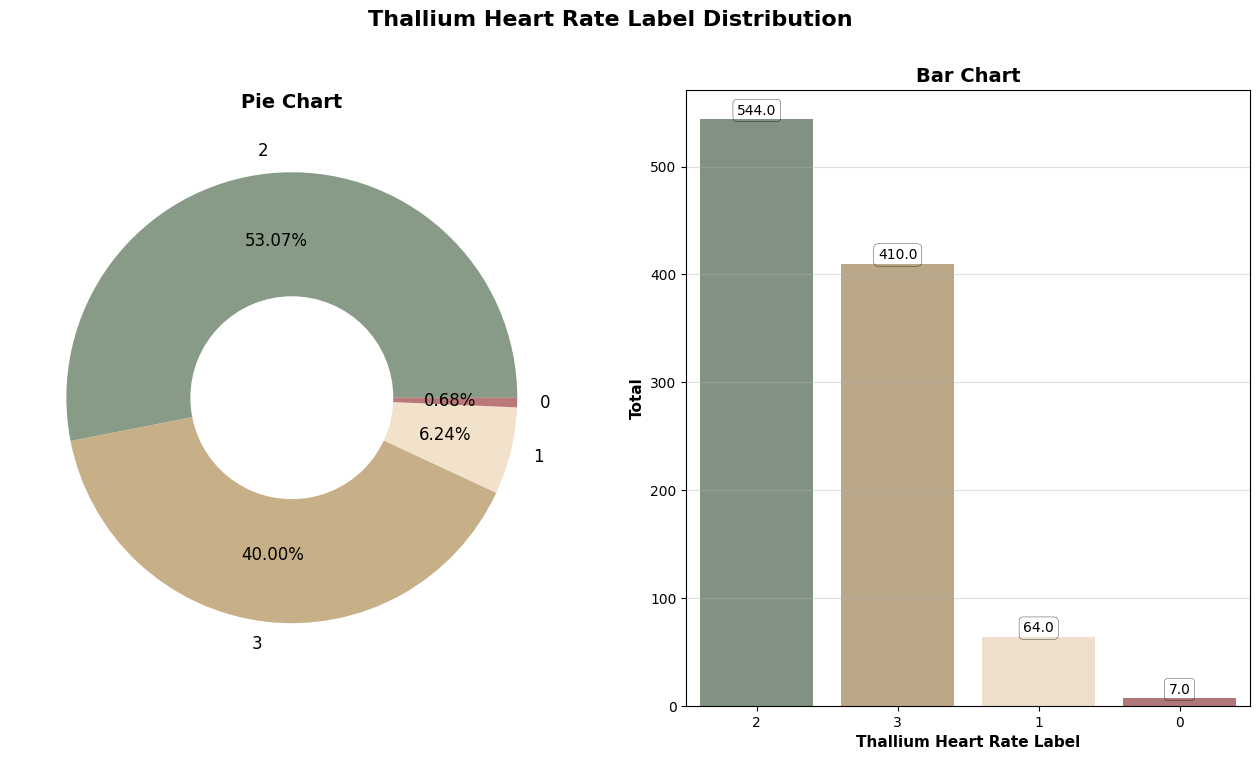

In [17]:
# thal(Thallium heart rate label) - categorical(8)
colors = ['#698269', '#B99B6B', '#F1DBBF', '#AA5656']
labels = ['2', '3', '1', '0']
order = df['thal'].value_counts().index

# Plot frame
plt.figure(figsize=(16,8))
plt.suptitle('Thallium Heart Rate Label Distribution', fontweight='heavy', fontsize=16, fontfamily='sans-serif')

# Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.pie(df['thal'].value_counts(), labels=labels, colors=colors, wedgeprops=dict(alpha=0.8), 
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize':12})

centre = plt.Circle((0, 0), 0.45, fc='w')
plt.gcf().gca().add_artist(centre)

# Bar chart
countplt = plt.subplot(1, 2, 2)
plt.title('Bar Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='thal', data=df, palette=colors, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+4.25,rect.get_height(), horizontalalignment='center', 
             fontsize=10, bbox=dict(facecolor='none', linewidth=0.25, boxstyle='round'))

plt.xlabel('Thallium Heart Rate Label', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.grid(axis='y', alpha=0.4)

# Count Categorical Labels
print('*' * 20)
print('\033[1m'+'.: "thal" Total :.'+'\033[0m')
print('*' * 20)
df.thal.value_counts(dropna=False)

.: Age Column Skewness & Kurtosis :.
****************************************
Skewness: -0.249
Kurtosis: -0.526




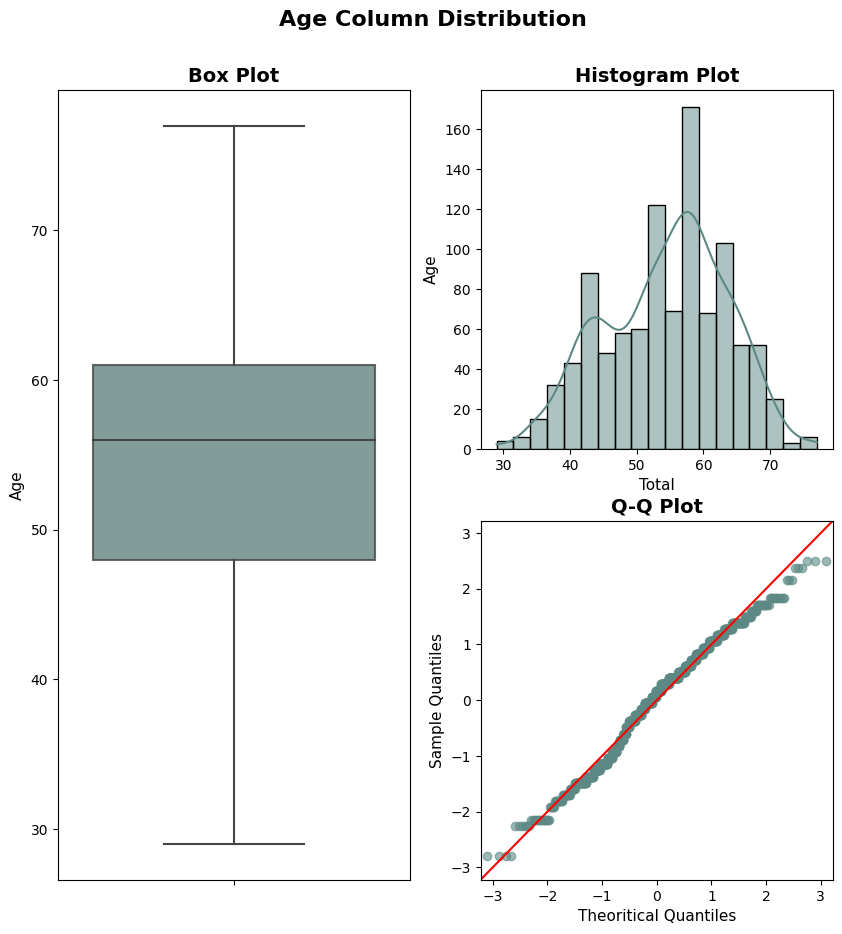

In [18]:
# age - numerical(1)
var = 'age'
color = "#5C8984"
fig = plt.figure(figsize=(10, 10))

# Skewness & Kurtosis
print('\033[1m'+'.: Age Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis=0, skipna=True)))
print('\033[0m'+'Kurtosis:' +
      '\033[1m {:.3f}'.format(df[var].kurt(axis=0, skipna=True)))
print('\n')

# General Title
fig.suptitle('Age Column Distribution', fontweight='bold',
             fontsize=16, fontfamily='sans-serif')
fig.subplots_adjust(top=0.9)

# Histogram
ax_1 = fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold',
          fontsize=14, fontfamily='sans-serif')
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='sans-serif')

# Q-Q Plot
ax_2 = fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
qqplot(df[var], fit=True, line='45', ax=ax_2,
       markerfacecolor=color, markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular',
           fontsize=11, fontfamily='sans-serif')
plt.ylabel('Sample Quantiles', fontweight='regular',
           fontsize=11, fontfamily='sans-serif')

# Box Plot
ax_3 = fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
sns.boxplot(data=df, y=var, color=color,
            boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='sans-serif')

plt.show()

.: Resting Blood Pressure Column Skewness & Kurtosis :.
*******************************************************
Skewness: 0.740
Kurtosis: 0.991




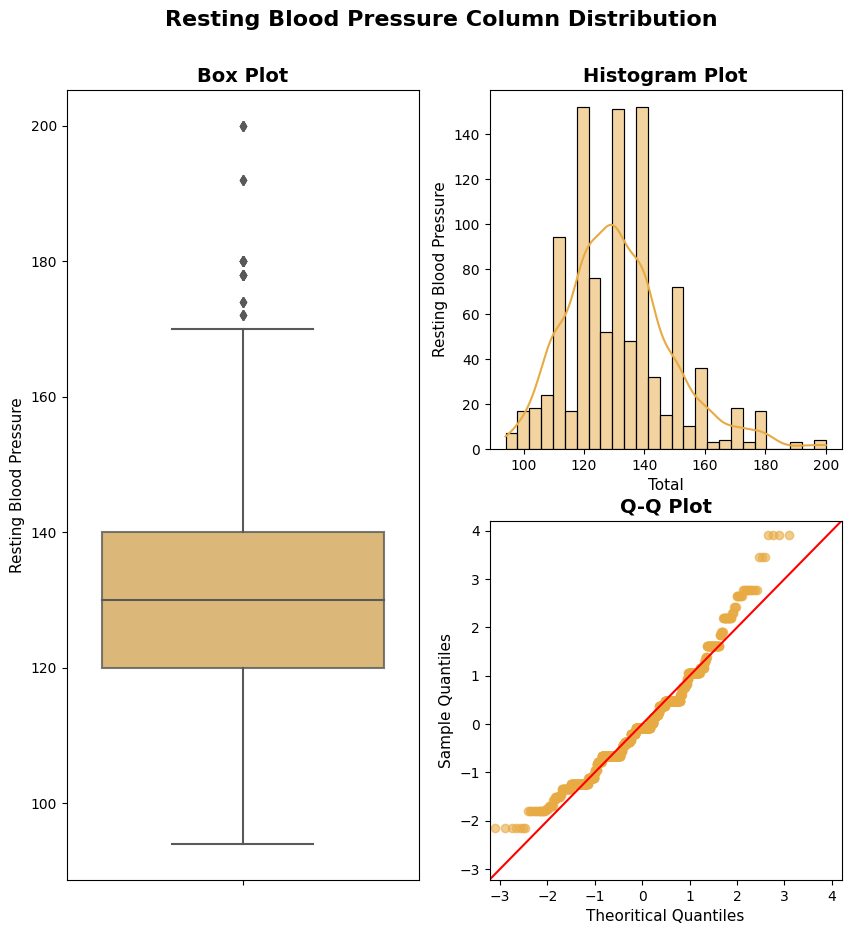

In [19]:
# trestbps(Resting blood pressure) - numerical(2)
var = 'trestbps'
color = '#E8AA42'
fig = plt.figure(figsize=(10, 10))

# Skewness & Kurtosis
print('\033[1m'+'.: Resting Blood Pressure Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 55)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis=0, skipna=True)))
print('\033[0m'+'Kurtosis:' +
      '\033[1m {:.3f}'.format(df[var].kurt(axis=0, skipna=True)))
print('\n')

# General Title
fig.suptitle('Resting Blood Pressure Column Distribution', fontweight='bold', fontsize=16, fontfamily='sans-serif')
fig.subplots_adjust(top=0.9)

# Histogram
ax_1 = fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Resting Blood Pressure', fontweight='regular', fontsize=11, fontfamily='sans-serif')

# Q-Q Plot
ax_2 = fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color,
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, fontfamily='sans-serif')

# Box Plot
ax_3 = fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Resting Blood Pressure', fontweight='regular', fontsize=11, fontfamily='sans-serif')

plt.show()

.: Serum Cholestoral Column Skewness & Kurtosis :.
*********************************************
Skewness: 1.074
Kurtosis: 3.997




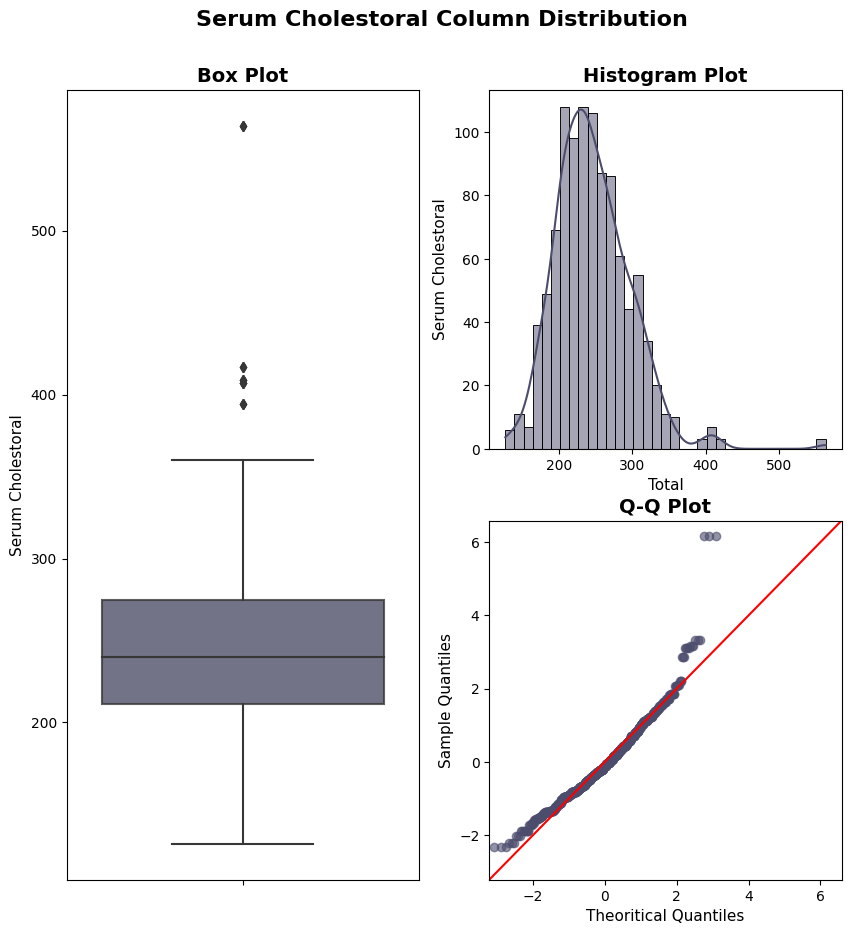

In [20]:
# chol (Serum Cholestoral in mg/dl) - numerical(3)
var = 'chol'
color = '#4C4C6D'
fig = plt.figure(figsize=(10, 10))

# Skewness & Kurtosis
print('\033[1m'+'.: Serum Cholestoral Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 45)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis=0, skipna=True)))
print('\033[0m'+'Kurtosis:' +
      '\033[1m {:.3f}'.format(df[var].kurt(axis=0, skipna=True)))
print('\n')

# General Title
fig.suptitle('Serum Cholestoral Column Distribution',
             fontweight='bold', fontsize=16, fontfamily='sans-serif')
fig.subplots_adjust(top=0.9)

# Histogram
ax_1 = fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold',
          fontsize=14, fontfamily='sans-serif')
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Serum Cholestoral', fontweight='regular',
           fontsize=11, fontfamily='sans-serif')

# Q-Q Plot
ax_2 = fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
qqplot(df[var], fit=True, line='45', ax=ax_2,
       markerfacecolor=color, markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular',
           fontsize=11, fontfamily='sans-serif')
plt.ylabel('Sample Quantiles', fontweight='regular',
           fontsize=11, fontfamily='sans-serif')

# Box Plot
ax_3 = fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
sns.boxplot(data=df, y=var, color=color,
            boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Serum Cholestoral', fontweight='regular',
           fontsize=11, fontfamily='sans-serif')

plt.show()

.: Maximum Heart Rate Column Skewness & Kurtosis :.
**************************************************
Skewness: -0.514
Kurtosis: -0.089




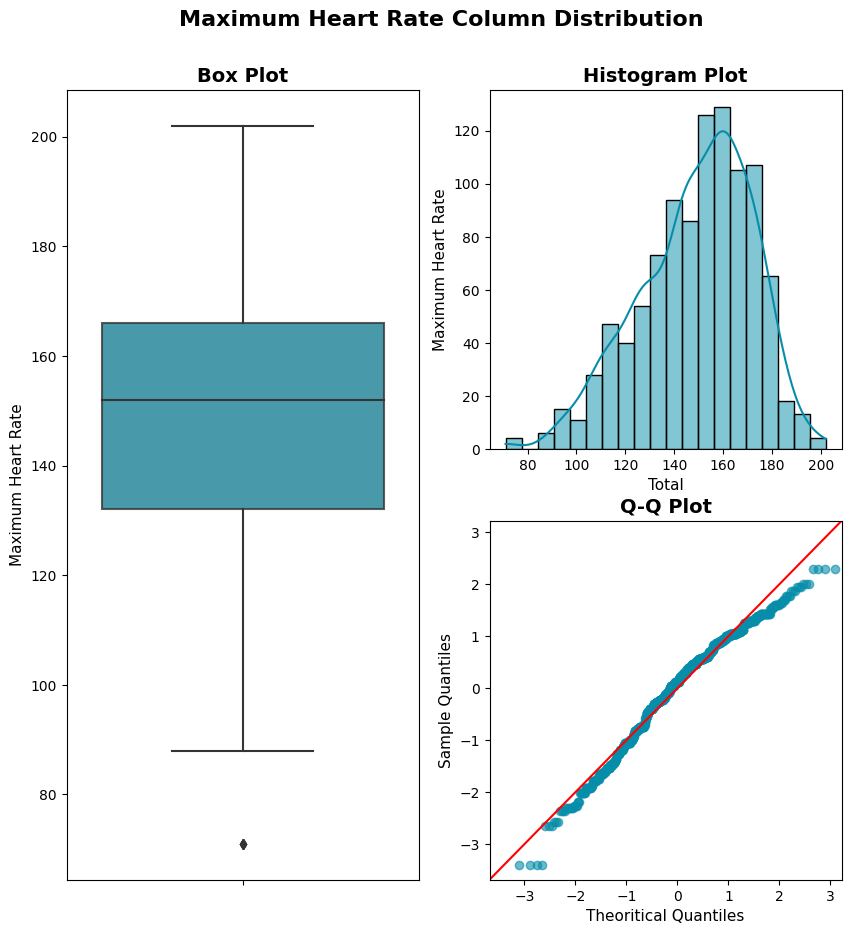

In [21]:
# thalach (Maximum Heart Rate) - numerical(4)
var = 'thalach'
color = "#068DA9"
fig = plt.figure(figsize=(10, 10))

# Skewness & Kurtosis
print('\033[1m'+'.: Maximum Heart Rate Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 50)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis=0, skipna=True)))
print('\033[0m'+'Kurtosis:' +
      '\033[1m {:.3f}'.format(df[var].kurt(axis=0, skipna=True)))
print('\n')

# General Title
fig.suptitle('Maximum Heart Rate Column Distribution',
             fontweight='bold', fontsize=16, fontfamily='sans-serif')
fig.subplots_adjust(top=0.9)

# Histogram
ax_1 = fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold',
          fontsize=14, fontfamily='sans-serif')
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Maximum Heart Rate', fontweight='regular',
           fontsize=11, fontfamily='sans-serif')

# Q-Q Plot
ax_2 = fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
qqplot(df[var], fit=True, line='45', ax=ax_2,
       markerfacecolor=color, markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular',
           fontsize=11, fontfamily='sans-serif')
plt.ylabel('Sample Quantiles', fontweight='regular',
           fontsize=11, fontfamily='sans-serif')

# Box Plot
ax_3 = fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
sns.boxplot(data=df, y=var, color=color,
            boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Maximum Heart Rate', fontweight='regular',
           fontsize=11, fontfamily='sans-serif')

plt.show()

.: "oldpeak" Column Skewness & Kurtosis :.
****************************************
Skewness: 1.211
Kurtosis: 1.314




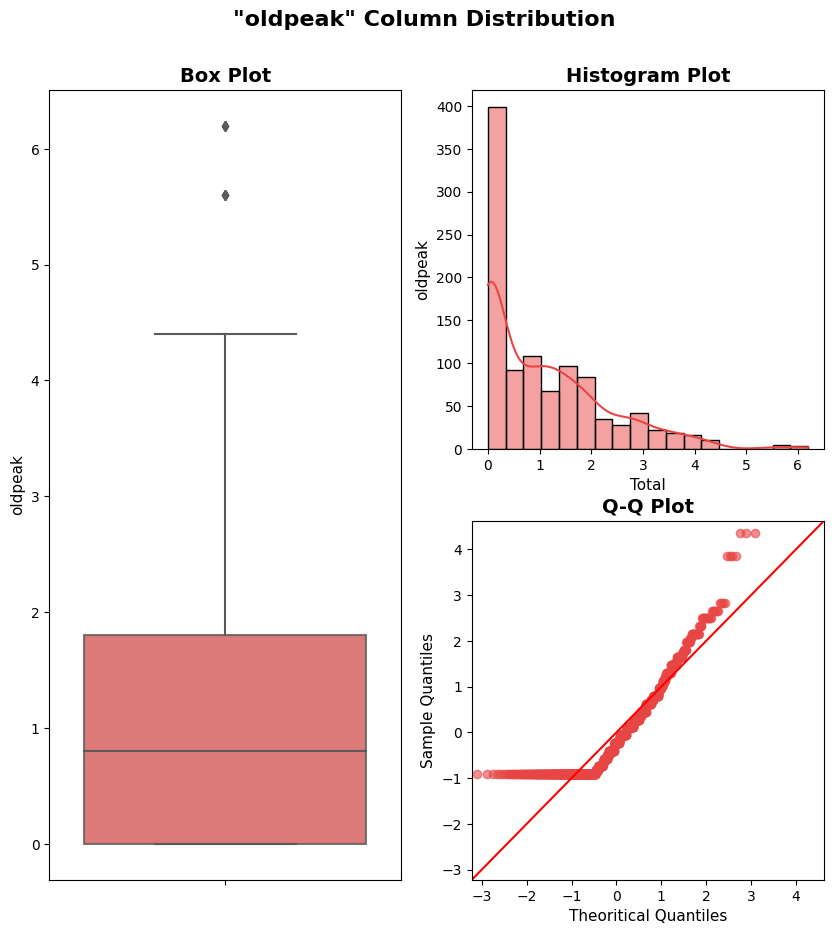

In [22]:
# oldpeak(Stress test depression label) - numerical(5)
var = 'oldpeak'
color = '#E84545'
fig = plt.figure(figsize=(10, 10))

# Skewness & Kurtosis
print('\033[1m'+'.: "oldpeak" Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis=0, skipna=True)))
print('\033[0m'+'Kurtosis:' +
      '\033[1m {:.3f}'.format(df[var].kurt(axis=0, skipna=True)))
print('\n')

# General Title
fig.suptitle('"oldpeak" Column Distribution', fontweight='bold', fontsize=16, fontfamily='sans-serif')
fig.subplots_adjust(top=0.9)

# Histogram
ax_1 = fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, fontfamily='sans-serif')
plt.ylabel('oldpeak', fontweight='regular', fontsize=11, fontfamily='sans-serif')

# Q-Q Plot
ax_2 = fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, fontfamily='sans-serif')

# Box Plot
ax_3 = fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('oldpeak', fontweight='regular', fontsize=11, fontfamily='sans-serif')

plt.show()

In [23]:
# Descriptive statistics
df.select_dtypes(exclude='object').describe().T.style.background_gradient(
    cmap='Blues').set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
age,1025.000000,54.434146,9.072290,29.000000,48.000000,56.000000,61.000000,77.000000
trestbps,1025.000000,131.611707,17.516718,94.000000,120.000000,130.000000,140.000000,200.000000
chol,1025.000000,246.000000,51.592510,126.000000,211.000000,240.000000,275.000000,564.000000
thalach,1025.000000,149.114146,23.005724,71.000000,132.000000,152.000000,166.000000,202.000000
oldpeak,1025.000000,1.071512,1.175053,0.000000,0.000000,0.800000,1.800000,6.200000
target,1025.000000,0.513171,0.500070,0.000000,0.000000,1.000000,1.000000,1.000000


<AxesSubplot: >

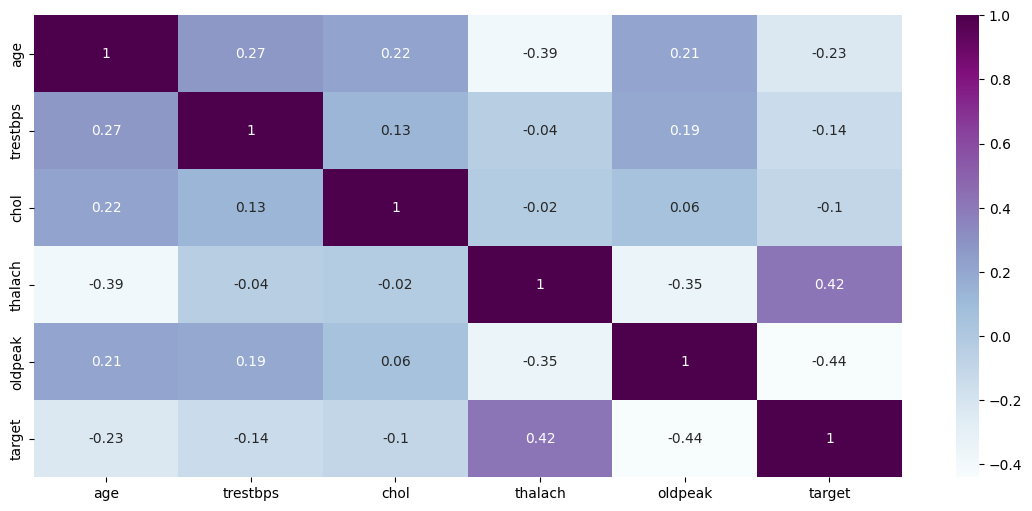

In [24]:
# Heatmap
heat_map = df.corr()
plt.figure(figsize = (14,6))
sns.heatmap(round(heat_map, 2), annot=True, cmap = 'BuPu')

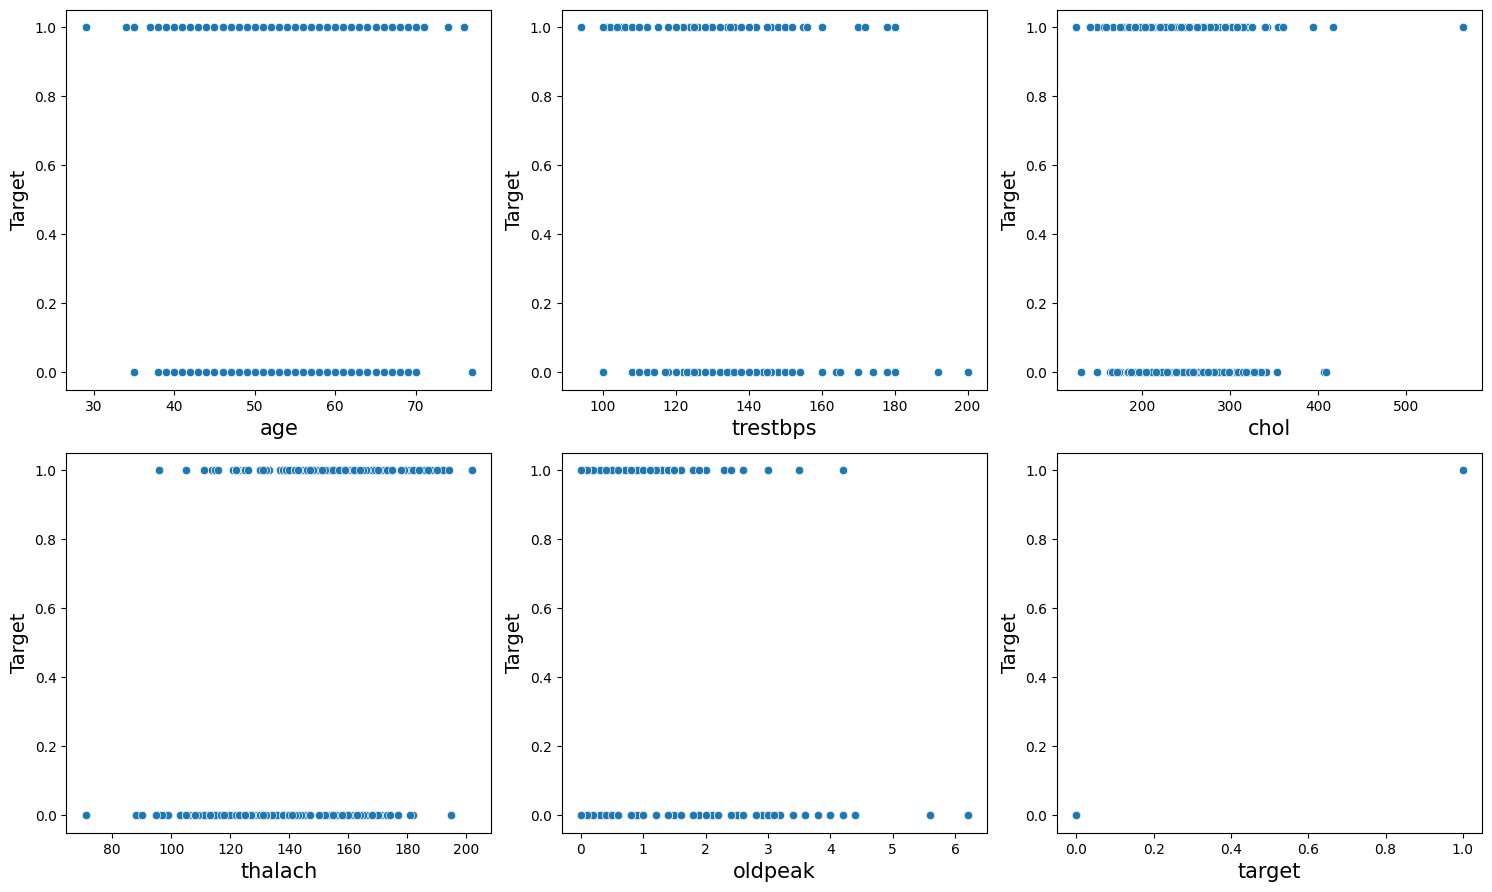

In [25]:
# Outliers visualization
fig = plt.figure(figsize=(15, 9))
for index in range(len(numerical_att.columns)):
    plt.subplot(2, 3, index + 1)
    sns.scatterplot(
        x=numerical_att.iloc[:, index], y=df.target, data=numerical_att)
    plt.xlabel(numerical_att.columns[index], fontsize=15)
    plt.ylabel("Target", fontsize=14)

fig.tight_layout(pad=1.0)

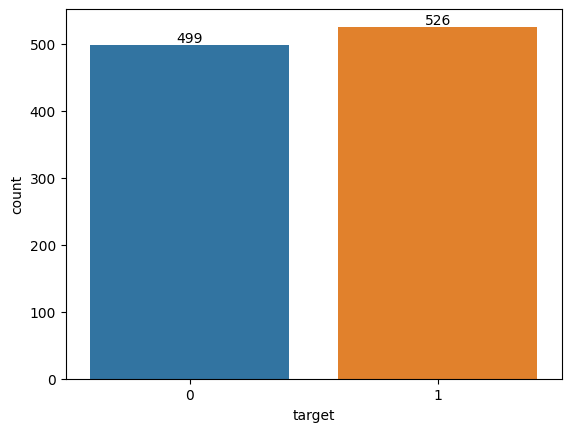

In [26]:
# Check whether target is balanced
ax = sns.countplot(data=df, x='target')

# Add count labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

In [27]:
# Check for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [28]:
# One-hot encoding on categorical attributes
dum_df = pd.get_dummies(df, columns=['thal', 'ca', 'slope',
     'exang', 'restecg', 'fbs', 'cp', 'sex'], drop_first=True)

In [29]:
X = dum_df.drop(['target'], axis=1)
y = dum_df['target']

In [30]:
# MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(X)

In [31]:
# Split the dataset to 80:20
x_train, x_test, y_train , y_test = train_test_split(
    x, y, test_size=0.2 , random_state=42)

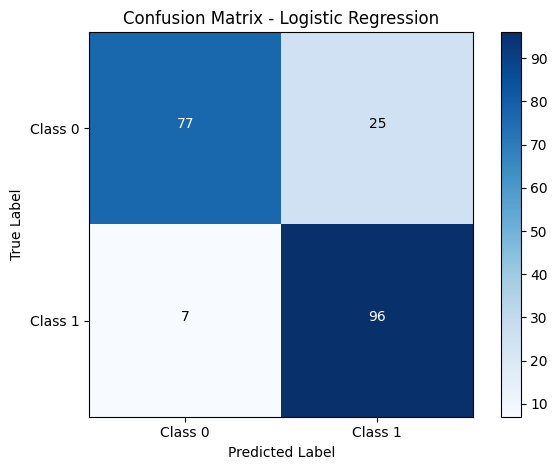



Accuracy of Logistic Regression: 84.39024390243902 

              precision    recall  f1-score   support

           0       0.92      0.75      0.83       102
           1       0.79      0.93      0.86       103

    accuracy                           0.84       205
   macro avg       0.86      0.84      0.84       205
weighted avg       0.85      0.84      0.84       205



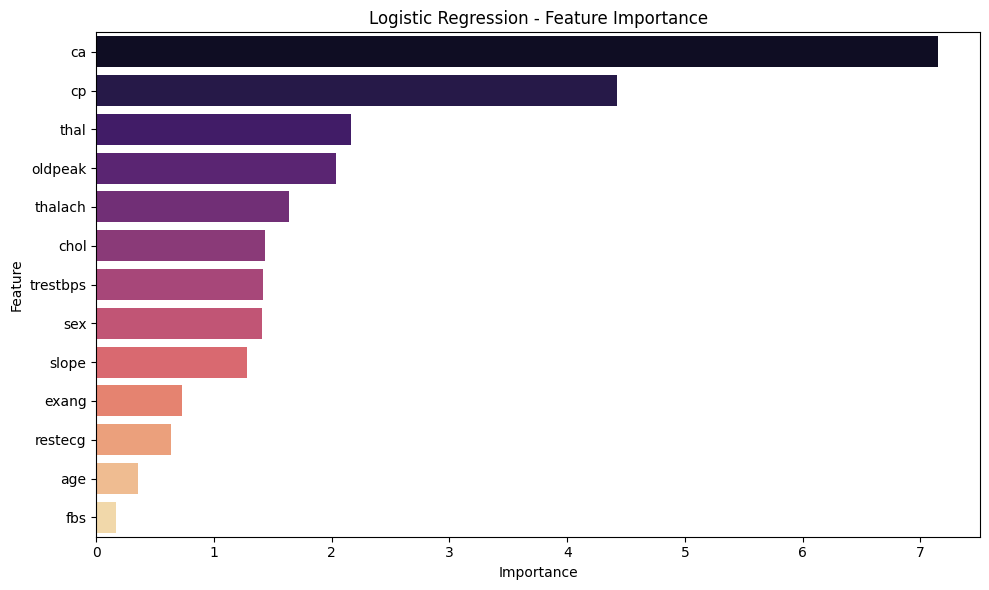

In [32]:
# Logistic Regression
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(x_train, y_train)
lr_predicted = lr.predict(x_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predicted)
lr_acc_score = accuracy_score(y_test, lr_predicted)

# Plot the confusion matrix
plt.imshow(lr_conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix - Logistic Regression')
plt.colorbar()

# Remove the grid lines
plt.grid(False)

# Set labels
classes = ['Class 0', 'Class 1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Fill the confusion matrix cells with the count values
thresh = lr_conf_matrix.max() / 2.
for i in range(lr_conf_matrix.shape[0]):
    for j in range(lr_conf_matrix.shape[1]):
        plt.text(j, i, format(lr_conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if lr_conf_matrix[i, j] > thresh else "black")
        
# Display the plot
plt.tight_layout()
plt.show()
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predicted))



# Get feature importance
importance = np.abs(lr.coef_[0])

# Get the original feature names
original_feature_names = [col.split('_')[0] for col in X.columns]

# Create a DataFrame to store feature importance
feature_importance = pd.DataFrame(
    {'Feature': original_feature_names, 'Importance': importance})
feature_importance = feature_importance.groupby('Feature').sum().reset_index()
feature_importance = feature_importance.sort_values(
    'Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature',
            data=feature_importance, palette='magma')
plt.title('Logistic Regression - Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.xticks()
plt.tight_layout()
plt.show()

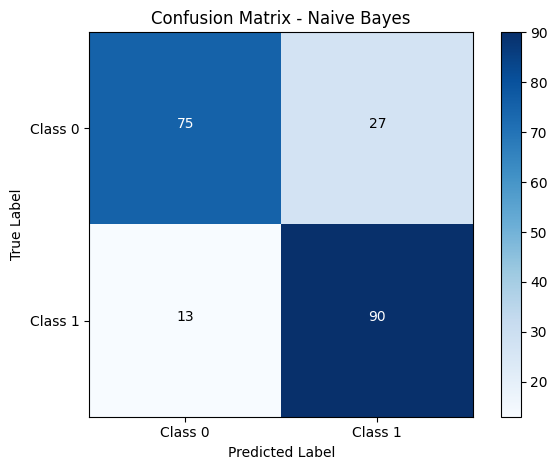



Accuracy of Naive Bayes model: 80.48780487804879 

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       102
           1       0.77      0.87      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



In [33]:
# Naive Bayes
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(x_train,y_train)
nb_predicted = nb.predict(x_test)
nb_conf_matrix = confusion_matrix(y_test, nb_predicted)
nb_acc_score = accuracy_score(y_test, nb_predicted)

# Plot the confusion matrix
plt.imshow(nb_conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix - Naive Bayes')
plt.colorbar()

# Remove the grid lines
plt.grid(False)

# Set labels
classes = ['Class 0', 'Class 1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Fill the confusion matrix cells with the count values
thresh = nb_conf_matrix.max() / 2.
for i in range(nb_conf_matrix.shape[0]):
    for j in range(nb_conf_matrix.shape[1]):
        plt.text(j, i, format(nb_conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if nb_conf_matrix[i, j] > thresh else "black")
        
# Display the plot
plt.tight_layout()
plt.show()
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nb_predicted))

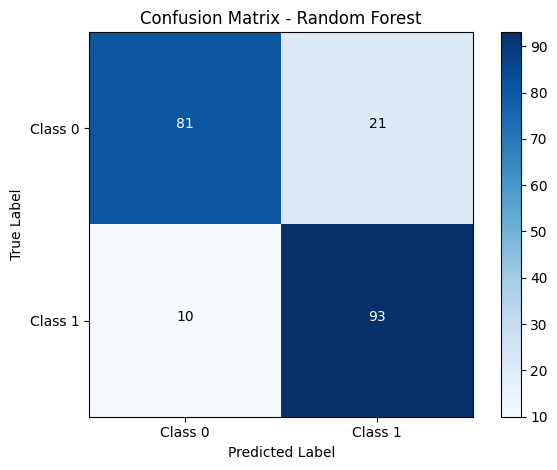



Accuracy of Random Forest: 84.8780487804878 

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       102
           1       0.82      0.90      0.86       103

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



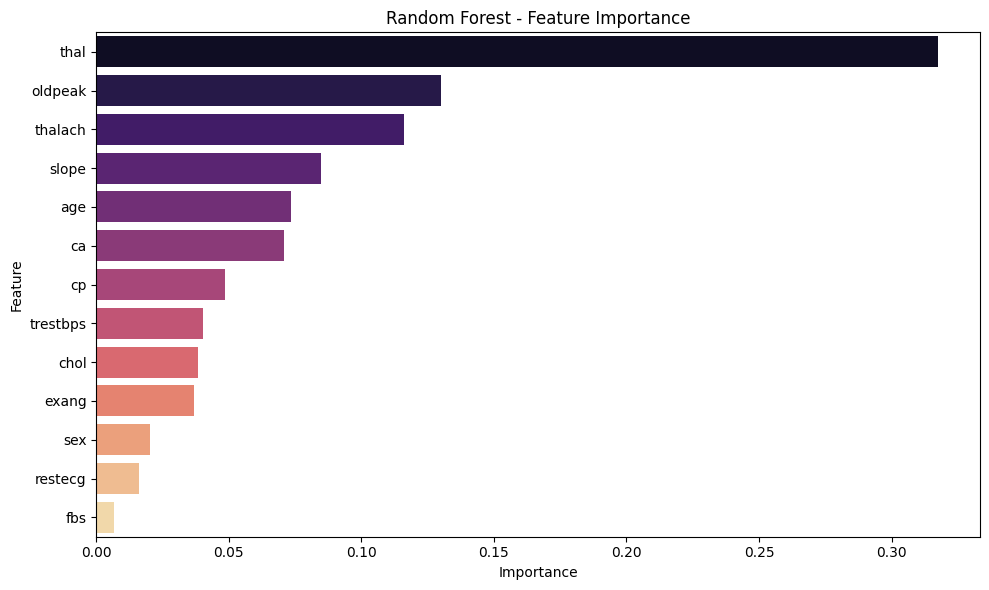

In [34]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(x_train,y_train)
rf_predicted = rf.predict(x_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)

# Plot the confusion matrix
plt.imshow(rf_conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix - Random Forest')
plt.colorbar()

# Remove the grid lines
plt.grid(False)

# Set labels
classes = ['Class 0', 'Class 1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Fill the confusion matrix cells with the count values
thresh = rf_conf_matrix.max() / 2.
for i in range(rf_conf_matrix.shape[0]):
    for j in range(rf_conf_matrix.shape[1]):
        plt.text(j, i, format(rf_conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if rf_conf_matrix[i, j] > thresh else "black")
        
# Display the plot
plt.tight_layout()
plt.show()
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))



# Feature Importance
importance = rf.feature_importances_

# Get the original feature names without the dummy columns
original_feature_names = [col.split('_')[0] for col in dum_df.drop('target', axis=1).columns]

# Create a DataFrame to store feature importance
feature_importance = pd.DataFrame(
    {'Feature': original_feature_names, 'Importance': importance})
feature_importance = feature_importance.groupby('Feature').sum().reset_index()
feature_importance = feature_importance.sort_values(
    'Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature',
            data=feature_importance, palette='magma')
plt.title('Random Forest - Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.xticks()
plt.tight_layout()
plt.show()

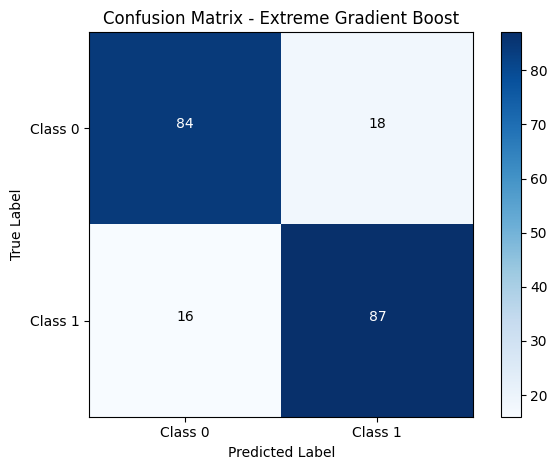



Accuracy of Extreme Gradient Boost: 83.41463414634146 

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       102
           1       0.83      0.84      0.84       103

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



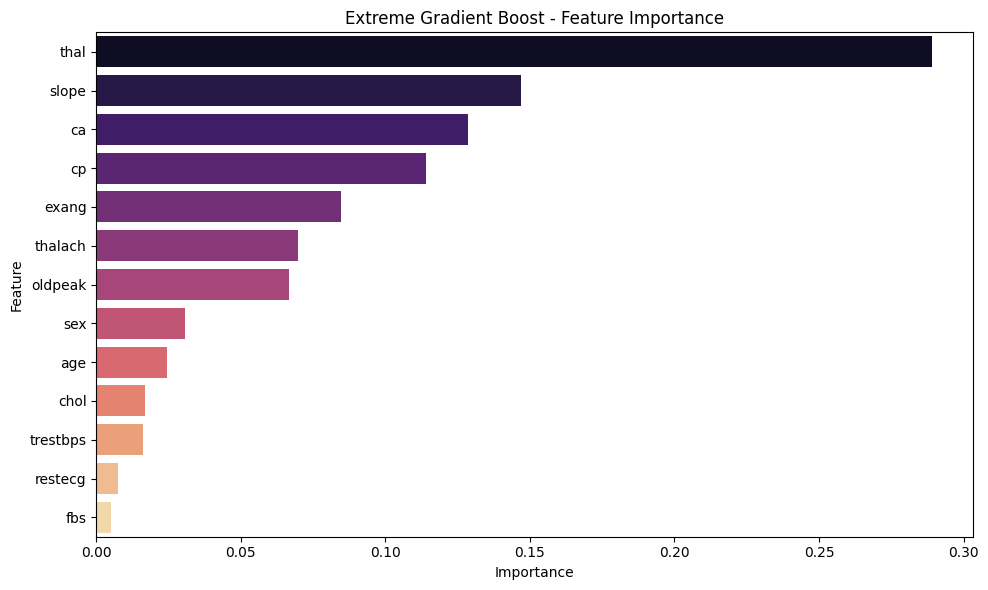

In [35]:
# Extreme Gradient Boost
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
        reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(x_train, y_train)
xgb_predicted = xgb.predict(x_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)

# Plot the confusion matrix
plt.imshow(xgb_conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix - Extreme Gradient Boost')
plt.colorbar()

# Remove the grid lines
plt.grid(False)

# Set labels
classes = ['Class 0', 'Class 1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Fill the confusion matrix cells with the count values
thresh = xgb_conf_matrix.max() / 2.
for i in range(xgb_conf_matrix.shape[0]):
    for j in range(xgb_conf_matrix.shape[1]):
        plt.text(j, i, format(xgb_conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if xgb_conf_matrix[i, j] > thresh else "black")
        
# Display the plot
plt.tight_layout()
plt.show()
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))



# Get feature importance
importance = xgb.feature_importances_

#Get the original feature names without the dummy columns
original_feature_names = [col.split('_')[0]
                          for col in dum_df.drop('target', axis=1).columns]

# Create a DataFrame to store feature importance
feature_importance = pd.DataFrame(
    {'Feature': original_feature_names, 'Importance': importance})
feature_importance = feature_importance.groupby('Feature').sum().reset_index()
feature_importance = feature_importance.sort_values(
    'Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature',
            data=feature_importance, palette='magma')
plt.title('Extreme Gradient Boost - Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.xticks()
plt.tight_layout()
plt.show()

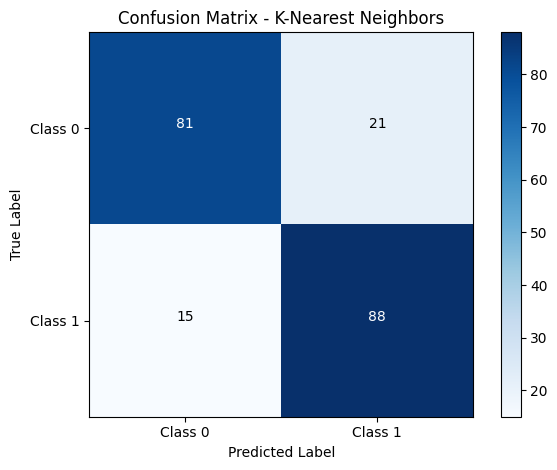



Accuracy of K-Nearest Neighbors: 82.4390243902439 

              precision    recall  f1-score   support

           0       0.84      0.79      0.82       102
           1       0.81      0.85      0.83       103

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205



In [36]:
# K-Nearest Neighbors
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
knn_predicted = knn.predict(x_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)

# Plot the confusion matrix
plt.imshow(knn_conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.colorbar()

# Remove the grid lines
plt.grid(False)

# Set labels
classes = ['Class 0', 'Class 1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Fill the confusion matrix cells with the count values
thresh = knn_conf_matrix.max() / 2.
for i in range(knn_conf_matrix.shape[0]):
    for j in range(knn_conf_matrix.shape[1]):
        plt.text(j, i, format(knn_conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if knn_conf_matrix[i, j] > thresh else "black")
        
# Display the plot
plt.tight_layout()
plt.show()
print("\n")
print("Accuracy of K-Nearest Neighbors:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

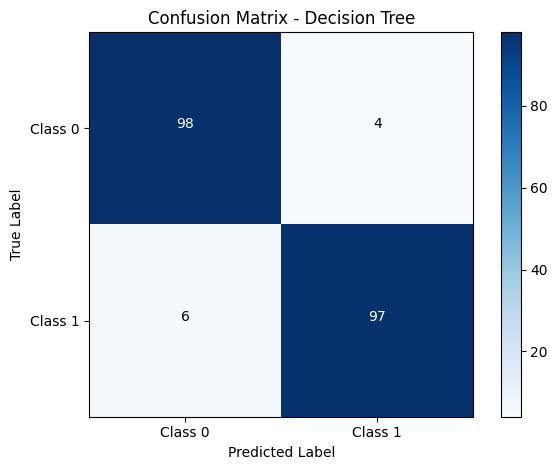



Accuracy of Decision Tree Classifier: 95.1219512195122 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       102
           1       0.96      0.94      0.95       103

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



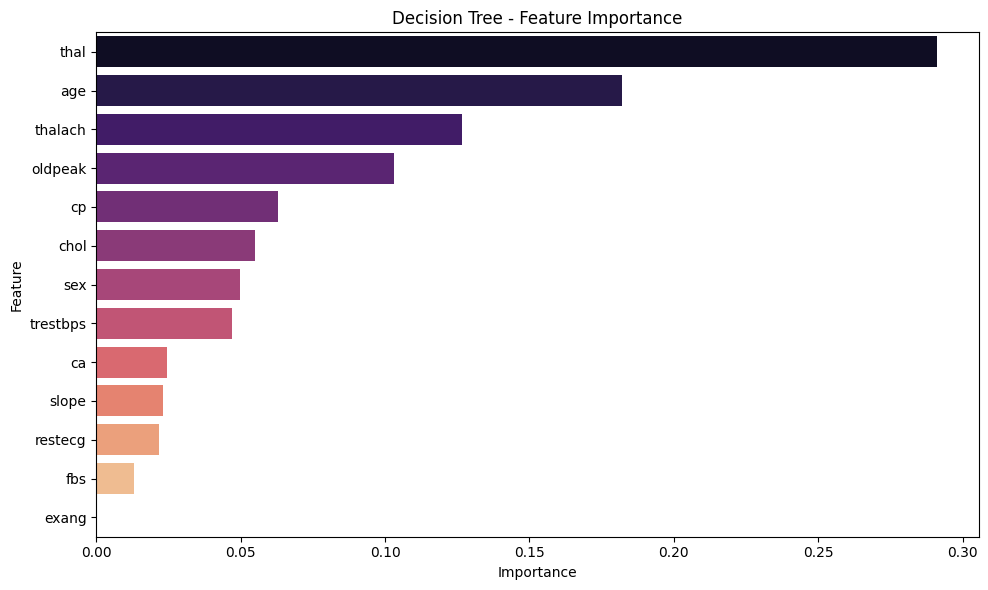

In [37]:
# Decision Tree
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(x_train, y_train)
dt_predicted = dt.predict(x_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)

# Plot the confusion matrix
plt.imshow(dt_conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix - Decision Tree')
plt.colorbar()

# Remove the grid lines
plt.grid(False)

# Set labels
classes = ['Class 0', 'Class 1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Fill the confusion matrix cells with the count values
thresh = dt_conf_matrix.max() / 2.
for i in range(dt_conf_matrix.shape[0]):
    for j in range(dt_conf_matrix.shape[1]):
        plt.text(j, i, format(dt_conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if dt_conf_matrix[i, j] > thresh else "black")
        
# Display the plot
plt.tight_layout()
plt.show()
print("\n")
print("Accuracy of Decision Tree Classifier:", dt_acc_score*100, '\n')
print(classification_report(y_test, dt_predicted))



# Get feature importance
importance = dt.feature_importances_

#Get the original feature names without the dummy columns
original_feature_names = [col.split('_')[0]
                          for col in dum_df.drop('target', axis=1).columns]

# Create a DataFrame to store feature importance
feature_importance = pd.DataFrame(
    {'Feature': original_feature_names, 'Importance': importance})
feature_importance = feature_importance.groupby('Feature').sum().reset_index()
feature_importance = feature_importance.sort_values(
    'Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature',
            data=feature_importance, palette='magma')
plt.title('Decision Tree - Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.xticks()
plt.tight_layout()
plt.show()

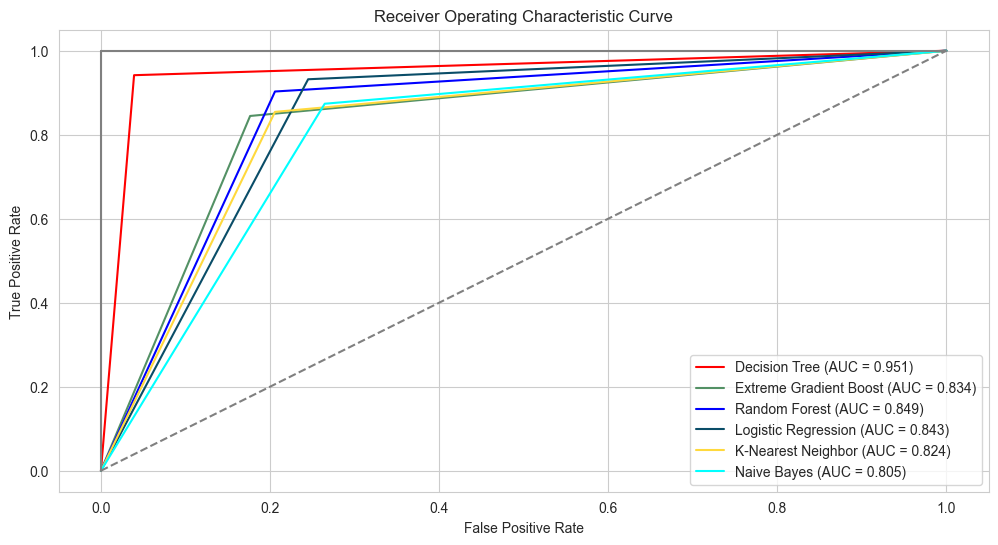

In [38]:
# ROC curve and AUC
lr_false_positive_rate, lr_true_positive_rate, lr_threshold = roc_curve(
    y_test, lr_predicted)
nb_false_positive_rate, nb_true_positive_rate, nb_threshold = roc_curve(
    y_test, nb_predicted)
rf_false_positive_rate, rf_true_positive_rate, rf_threshold = roc_curve(
    y_test, rf_predicted)
xgb_false_positive_rate, xgb_true_positive_rate, xgb_threshold = roc_curve(
    y_test, xgb_predicted)
knn_false_positive_rate, knn_true_positive_rate, knn_threshold = roc_curve(
    y_test, knn_predicted)
dt_false_positive_rate, dt_true_positive_rate, dt_threshold = roc_curve(
    y_test, dt_predicted)

lr_auc = roc_auc_score(y_test, lr_predicted)
nb_auc = roc_auc_score(y_test, nb_predicted)
rf_auc = roc_auc_score(y_test, rf_predicted)
xgb_auc = roc_auc_score(y_test, xgb_predicted)
knn_auc = roc_auc_score(y_test, knn_predicted)
dt_auc = roc_auc_score(y_test, dt_predicted)

colors = ['#FF0000', '#539165', '#0000FF', '#0A4D68', '#FFD93D', '#00FFFF', '#800080']

sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
plt.title('Receiver Operating Characteristic Curve')

plt.plot(dt_false_positive_rate, dt_true_positive_rate,
         label=f'Decision Tree (AUC = {dt_auc:.3f})', color=colors[0])
plt.plot(xgb_false_positive_rate, xgb_true_positive_rate,
         label=f'Extreme Gradient Boost (AUC = {xgb_auc:.3f})', color=colors[1])
plt.plot(rf_false_positive_rate, rf_true_positive_rate,
         label=f'Random Forest (AUC = {rf_auc:.3f})', color=colors[2])
plt.plot(lr_false_positive_rate, lr_true_positive_rate,
         label=f'Logistic Regression (AUC = {lr_auc:.3f})', color=colors[3])
plt.plot(knn_false_positive_rate, knn_true_positive_rate,
         label=f'K-Nearest Neighbor (AUC = {knn_auc:.3f})', color=colors[4])
plt.plot(nb_false_positive_rate, nb_true_positive_rate,
         label=f'Naive Bayes (AUC = {nb_auc:.3f})', color=colors[5])


plt.plot([0, 1], ls='--', c='grey')
plt.plot([0, 0], [1, 0], c='grey')
plt.plot([1, 1], c='grey')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

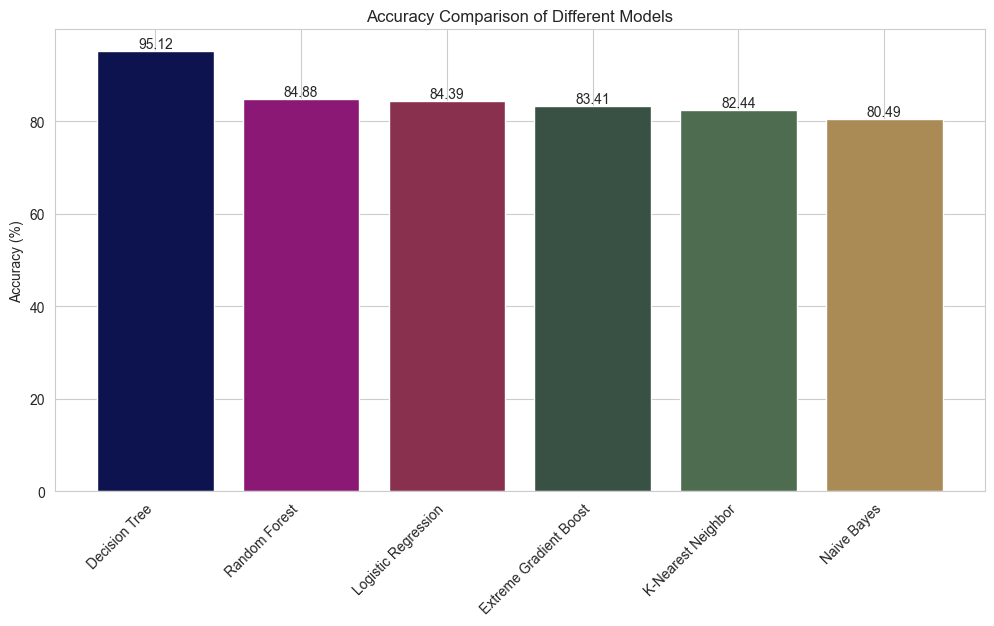

In [39]:
# Compare Accuracy 
colors = ['#0C134F', '#8B1874', '#88304E',
          '#395144', '#4E6C50', '#AA8B56', '#F0EBCE']

compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbor',
    'Naive Bayes', 'Decision Tree', 'Random Forest', 'Extreme Gradient Boost'],
                        'Accuracy': [lr_acc_score*100, knn_acc_score*100, 
     nb_acc_score*100, dt_acc_score*100, rf_acc_score*100, xgb_acc_score*100,]})

# Sort the table by accuracy in descending order
compare = compare.sort_values(by='Accuracy', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(compare['Model'], compare['Accuracy'], color=colors)
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of Different Models')
plt.xticks(rotation=45, ha='right')

# Add value labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.show()